## installing the important libraries

In [43]:
# !pip install -U dash 
# !pip install dash_gif_component
# !pip install jupyter_dash
# !pip install dash_bootstrap_components
# !pip install dash_daq

## imports

In [44]:
import plotly.express as px
import pandas as pd
import plotly.io as pio
import dash
from jupyter_dash import JupyterDash
import dash_core_components as dcc
import dash_html_components as html
import dash_bootstrap_components as dbc
from dash.dependencies import Input,Output,State 
import numpy as np

import time
import dash_gif_component as gif


import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import plotly.graph_objects as go
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix

In [45]:
# df = pd.read_csv('./content/heart.csv')
df = pd.read_csv('.//content//heart.csv')

df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [46]:
df.shape

(918, 12)

(918, 12)

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Ag

In [48]:
df.isna().sum().sum()

0

0

## handling the categorical variables

In [49]:
categorical_cols= df.select_dtypes(include=['object'])
categorical_cols.columns

Index(['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], dtype='object')

Index(['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], dtype='object')

In [50]:
for col in categorical_cols.columns:
    print(col,'-', len(categorical_cols[col].unique()),'Labels')

Sex - 2 Labels
ChestPainType - 4 Labels
RestingECG - 3 Labels
ExerciseAngina - 2 Labels
ST_Slope - 3 Labels
Sex - 2 Labels
ChestPainType - 4 Labels
RestingECG - 3 Labels
ExerciseAngina - 2 Labels
ST_Slope - 3 Labels


In [51]:
train, test = train_test_split(df,test_size=0.3,random_state= 42)

In [52]:
train.shape

(642, 12)

(642, 12)

In [53]:
train.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [54]:
test.shape

(276, 12)

(276, 12)

In [55]:
test.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [56]:
labels = [x for x in train.ChestPainType.value_counts().index]
values = train.ChestPainType.value_counts()
labels

['ASY', 'NAP', 'ATA', 'TA']

['ASY', 'NAP', 'ATA', 'TA']

In [57]:
values

ASY    354
NAP    137
ATA    124
TA      27
Name: ChestPainType, dtype: int64

ASY    354
NAP    137
ATA    124
TA      27
Name: ChestPainType, dtype: int64

In [58]:
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])

fig.update_layout(
    title_text="Distribution of data by Chest Pain Type (in %)")
fig.update_traces()
fig.show()

In [59]:
fig=px.histogram(df, 
                 x="HeartDisease",
                 color="Sex",
                 hover_data=df.columns,
                 title="Distribution of Heart Diseases by Gender",
                 barmode="group")
fig.show()

In [60]:
train['Sex'] = np.where(train['Sex'] == "M", 0, 1)
train['ExerciseAngina'] = np.where(train['ExerciseAngina'] == "N", 0, 1)
test['Sex'] = np.where(test['Sex'] == "M", 0, 1)
test['ExerciseAngina'] = np.where(test['ExerciseAngina'] == "N", 0, 1)

<ipython-input-60-3d5da43d58db>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-60-3d5da43d58db>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-60-3d5da43d58db>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-60-3d5da43

In [61]:

train.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
712,58,0,ASY,100,234,0,Normal,156,0,0.1,Up,1
477,61,0,ASY,110,0,1,Normal,108,1,2.0,Down,1
409,53,0,NAP,160,0,1,LVH,122,1,0.0,Flat,1
448,63,0,ASY,160,230,1,Normal,105,1,1.0,Flat,1
838,63,0,ASY,130,330,1,LVH,132,1,1.8,Up,1


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
712,58,0,ASY,100,234,0,Normal,156,0,0.1,Up,1
477,61,0,ASY,110,0,1,Normal,108,1,2.0,Down,1
409,53,0,NAP,160,0,1,LVH,122,1,0.0,Flat,1
448,63,0,ASY,160,230,1,Normal,105,1,1.0,Flat,1
838,63,0,ASY,130,330,1,LVH,132,1,1.8,Up,1


In [62]:
cate_cols=['ChestPainType', 'RestingECG', 'ST_Slope']

In [63]:
from sklearn.preprocessing import OneHotEncoder
encoder=OneHotEncoder(sparse=False)
train_encoded = pd.DataFrame(encoder.fit_transform(train[cate_cols]),index=train.index)
# print(train_X_encoded)
train_encoded.columns = encoder.get_feature_names(cate_cols)
train= pd.concat([train, train_encoded ], axis=1)#.reindex(X.index)
train.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,...,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
712,58,0,ASY,100,234,0,Normal,156,0,0.1,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
477,61,0,ASY,110,0,1,Normal,108,1,2.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
409,53,0,NAP,160,0,1,LVH,122,1,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
448,63,0,ASY,160,230,1,Normal,105,1,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
838,63,0,ASY,130,330,1,LVH,132,1,1.8,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,...,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
712,58,0,ASY,100,234,0,Normal,156,0,0.1,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
477,61,0,ASY,110,0,1,Normal,108,1,2.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
409,53,0,NAP,160,0,1,LVH,122,1,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
448,63,0,ASY,160,230,1,Normal,105,1,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
838,63,0,ASY,130,330,1,LVH,132,1,1.8,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [64]:
train.drop(cate_cols ,axis=1, inplace=True)
train.head()

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
712,58,0,100,234,0,156,0,0.1,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
477,61,0,110,0,1,108,1,2.0,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
409,53,0,160,0,1,122,1,0.0,1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
448,63,0,160,230,1,105,1,1.0,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
838,63,0,130,330,1,132,1,1.8,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
712,58,0,100,234,0,156,0,0.1,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
477,61,0,110,0,1,108,1,2.0,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
409,53,0,160,0,1,122,1,0.0,1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
448,63,0,160,230,1,105,1,1.0,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
838,63,0,130,330,1,132,1,1.8,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [65]:
train.shape

(642, 19)

(642, 19)

In [66]:
test_encoded = pd.DataFrame (encoder.transform(test[cate_cols]), index = test.index)
test_encoded.columns = encoder.get_feature_names(cate_cols)
test.drop(cate_cols,axis=1,inplace=True)

test=pd.concat([test, test_encoded ], axis=1)#.reindex(df_test.index)
test.head()

C:\Users\Mohamed\AppData\Roaming\Python\Python38\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
668,63,1,140,195,0,179,0,0.0,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
30,53,0,145,518,0,130,0,0.0,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
377,65,0,160,0,1,122,0,1.2,1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
535,56,0,130,0,0,122,1,1.0,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
807,54,0,108,309,0,156,0,0.0,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


C:\Users\Mohamed\AppData\Roaming\Python\Python38\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
668,63,1,140,195,0,179,0,0.0,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
30,53,0,145,518,0,130,0,0.0,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
377,65,0,160,0,1,122,0,1.2,1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
535,56,0,130,0,0,122,1,1.0,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
807,54,0,108,309,0,156,0,0.0,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [67]:
x_train=train.drop(['HeartDisease'],axis=1)
x_test=test.drop(['HeartDisease'],axis=1)

y_train=train['HeartDisease']
y_test=test['HeartDisease']
x_train.shape

(642, 18)

(642, 18)

In [68]:
x_test.shape

(276, 18)

(276, 18)

In [69]:
lr = LogisticRegression(max_iter=10000)
model1=lr.fit(x_train, y_train)

In [70]:
print("Train accuracy:",model1.score(x_train, y_train))

Train accuracy: 0.8613707165109035
Train accuracy: 0.8613707165109035


In [71]:
print("Test accuracy:",model1.score(x_test,y_test))

Test accuracy: 0.8804347826086957
Test accuracy: 0.8804347826086957


In [72]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = model1.predict_proba(x_test)
probs
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)


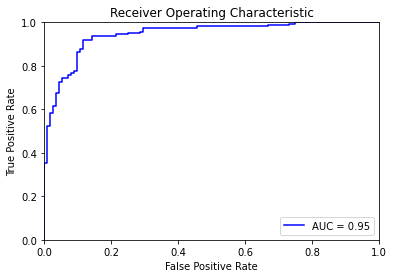

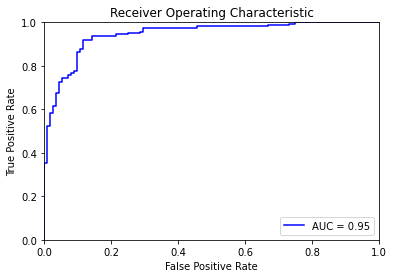

In [73]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
# plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [74]:
lrpred = lr.predict(x_test)

In [75]:
# save the model to disk
import pickle
filename = 'finalized_model.sav'
pickle.dump(model1, open(filename, 'wb'))

# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(x_test, y_test)
print(round(result,2)*100)

88.0
88.0


In [76]:
###################################################################################################################################

In [77]:
#testing prdict data
[50,'F','TA',100,180,1,'LVH',140,'N',2.5,'Up']

features_list=pd.DataFrame([{'Age':50,'Sex':'M','ChestPainType':'ASY','RestingBP':100,
              'Cholesterol':188,'FastingBS':1,'RestingECG':'LVH','MaxHR':140,'ExerciseAngina':'Y',
              'Oldpeak':2.5,'ST_Slope':'Down'}])
#print(features_list)
#1
features_list['Sex'] = np.where(features_list['Sex'] == "M", 0, 1)
features_list['ExerciseAngina'] = np.where(features_list['ExerciseAngina'] == "N", 0, 1)
#print(features_list)
# #2
features_encoded = pd.DataFrame(encoder.transform(features_list[cate_cols]), index = features_list.index)
features_encoded.columns = encoder.get_feature_names(cate_cols)
features_list.drop(cate_cols,axis=1,inplace=True)
testt=pd.concat([features_list, features_encoded], axis=1)#.reindex(df_test.index)
print(testt)
# #3
# # load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
pred_res = loaded_model.predict(testt.values.tolist())
prop_res = loaded_model.predict_proba(testt.values.tolist())
print(pred_res[0])
print(prop_res[0,0])
print(prop_res[0,1])

   Age  Sex  RestingBP  Cholesterol  FastingBS  MaxHR  ExerciseAngina  \
0   50    0        100          188          1    140               1   

   Oldpeak  ChestPainType_ASY  ChestPainType_ATA  ChestPainType_NAP  \
0      2.5                1.0                0.0                0.0   

   ChestPainType_TA  RestingECG_LVH  RestingECG_Normal  RestingECG_ST  \
0               0.0             1.0                0.0            0.0   

   ST_Slope_Down  ST_Slope_Flat  ST_Slope_Up  
0            1.0            0.0          0.0  
1
0.05556604725392211
0.9444339527460779
   Age  Sex  RestingBP  Cholesterol  FastingBS  MaxHR  ExerciseAngina  \
0   50    0        100          188          1    140               1   

   Oldpeak  ChestPainType_ASY  ChestPainType_ATA  ChestPainType_NAP  \
0      2.5                1.0                0.0                0.0   

   ChestPainType_TA  RestingECG_LVH  RestingECG_Normal  RestingECG_ST  \
0               0.0             1.0                0.0           

In [78]:
correlation_all = df.apply(lambda x : pd.factorize(x)[0]).corr(method = 'pearson')
df_corr = correlation_all
#df_corr['HeartDisease'] = df_corr['HeartDisease'].apply(change_value)
df_corr_negative = df_corr[df_corr['HeartDisease'] < 0] .copy()
df_corr_negative*=-1
df_corr[df_corr['HeartDisease'] < 0]  = df_corr_negative
df_corr = df_corr.sort_values(by='HeartDisease' , ascending=False)
df_corr.drop('HeartDisease',axis = 0,inplace = True)
df_corr = df_corr.rename_axis('Features')
fig = px.bar(df_corr , 
       x = 'HeartDisease' ,
       #x='Effect on Results',
       
       labels={'HeartDisease':'Effect on Results'},
       title = 'Each feature effect on final result'      
      )

In [79]:
df_corr.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
Features,,,,,,,,,,,,
ST_Slope,0.193808,-0.150693,0.352364,0.077019,0.089640,0.175774,0.078807,-0.016528,0.428706,0.227908,1.000000,0.558771
ExerciseAngina,0.160031,-0.190664,0.324049,0.064675,0.097292,0.060451,0.036119,-0.043243,1.000000,0.081988,0.428706,0.494282
ChestPainType,0.165602,-0.179766,1.000000,0.074097,0.145721,0.155111,0.112067,0.059256,0.324049,0.169007,0.352364,0.459017
Sex,0.035084,-1.000000,0.179766,0.039160,0.066700,0.120076,-0.018343,0.024015,0.190664,0.031506,0.150693,0.305445
FastingBS,0.116101,-0.120076,0.155111,0.112738,0.159263,1.000000,0.050707,0.026613,0.060451,0.102784,0.175774,0.267291


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
Features,,,,,,,,,,,,
ST_Slope,0.193808,-0.150693,0.352364,0.077019,0.089640,0.175774,0.078807,-0.016528,0.428706,0.227908,1.000000,0.558771
ExerciseAngina,0.160031,-0.190664,0.324049,0.064675,0.097292,0.060451,0.036119,-0.043243,1.000000,0.081988,0.428706,0.494282
ChestPainType,0.165602,-0.179766,1.000000,0.074097,0.145721,0.155111,0.112067,0.059256,0.324049,0.169007,0.352364,0.459017
Sex,0.035084,-1.000000,0.179766,0.039160,0.066700,0.120076,-0.018343,0.024015,0.190664,0.031506,0.150693,0.305445
FastingBS,0.116101,-0.120076,0.155111,0.112738,0.159263,1.000000,0.050707,0.026613,0.060451,0.102784,0.175774,0.267291


## the other part

In [80]:
df2 = df.copy()
def x(c):
    if c == 0:
        return 'no'
    else:
        return 'yes'
df2['HeartDisease'] = df2['HeartDisease'].apply(x)
df2[df2['Sex']=='M' ]
    

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,no
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,no
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,no
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,no
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,no
...,...,...,...,...,...,...,...,...,...,...,...,...
911,59,M,ASY,164,176,1,LVH,90,N,1.0,Flat,yes
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,yes
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,yes
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,yes


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,no
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,no
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,no
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,no
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,no
...,...,...,...,...,...,...,...,...,...,...,...,...
911,59,M,ASY,164,176,1,LVH,90,N,1.0,Flat,yes
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,yes
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,yes
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,yes


## variables

In [81]:
df_temp = df2.copy()
background_color = '#f1f1f1'
number_of_men = df_temp[df_temp['Sex'] == 'M'].count()[0]
number_of_women = df_temp[df_temp['Sex'] == 'F'].count()[0]
number_of_patients = df_temp[df_temp['HeartDisease'] == 'yes'].count()[0]
number_of_non_patients = df_temp[df_temp['HeartDisease'] == 'no'].count()[0]

## drop down and cards

In [82]:
#################
##range slider ##
#################
#my_range = pd.DataFrame(range(28,77)).iloc[:,0]
age_range = df2['Age'].unique()
slider = html.Div(children =[
        html.Center(html.B('age of individuals') ),
        html.Div(dcc.RangeSlider(
                id='age_range',
                min = age_range.min(),
                max = age_range.max(),
                step = 1 , # to make the slider not to stop in the middle
                allowCross=False,
                marks = {int(age):str(age) for age in age_range if age%10 ==0 },
                value = [30,35] ,
                vertical = False ,
                verticalHeight = 600
                )#end slider
                  )  #end div  
     ])


#######################
## drop down sex ######
#######################

drop_down_sex = html.Div([
                        html.Center(html.B('sex of individuals')),
                        html.Div(dcc.Dropdown(
                            id= 'drop_down_sex',
                            options={
                            'Male': 'male',
                            'Female': 'female', # use the value to display and the key to be used in the callback
                               },
                               value=['Male','Female'],
                                multi=True ,
                                style={'background-color': background_color , 'border-color':'blue','height':'60%' , 'width':'75%' , 'margin-left':'15%'}
                        )#end drop down
                                )

                    ] ) # end div
###############
## gif ########
###############
gif_heart = gif.GifPlayer(gif = 'assets/transparent.gif',
                               still = 'assets/transparent.png',
                              autoplay= True,
                             alt='logo'
                         )
    
#######################
## title ##############
#######################
    
title = html.Div(html.H1('Heart disease failure data', style = {'color' : 'red' , 'margin-top':'10px'}) )

##############
## man card ##
##############

card_man = dbc.Card(
    id= 'card_men',
    children=[
    dbc.CardBody( [
                        html.Div([
                            html.P(['Number of MEN']), #,  className="card-text" ),#style = {'color':'gray' }) ,
                            html.Center([
                                html.H3(number_of_men,id = 'number_of_men' ,style={'margin-top':'-10px'})# this negative is working (20 is large)
                            ]),
                        ],className='card-text'),
    ]) ,],
                        style={"height": 100 , 'width':'17rem', "background-color": "white" , 'border-color' : 'yellow' ,'border-width': '0px 0px 3px 0px',}
    ,
)#card


##################
## woman card ###
###################
card_woman = dbc.Card(
    id='card_women',
    children=[
    dbc.CardBody( [
                        html.Div([
                            html.P(['Number of WOMEN']), #,  className="card-text" ),#style = {'color':'gray' }) ,
                            html.Center([
                                html.H3(number_of_women, id= 'number_of_women' , style={'margin-top':'-10px'})# this negative is working (20 is large)
                            ]),
                        
    ], className='card-text') ,
    ]),],
                        style={"height": 100 , 'width':'17rem', "background-color": "white",'border-width': '0px 0px 3px 0px' , 'border-color' : 'green' ,}
    ,
)#card


##################
##patient card ##
##################
card_patient = dbc.Card(
    id= 'card_patient',
    children=[
    dbc.CardBody( [
                        html.Div([
                            html.P(['Number of PATIENTS']), #,  className="card-text" ),#style = {'color':'gray' }) ,
                            html.Center([
                                html.H3(number_of_patients , id= 'number_of_patients' , style={'margin-top':'-10px'})# this negative is working (20 is large)
                            ]),
                        
    ], className='card-text') ,
    ]) , ],
                        style={"height": 100 , 'width':'17rem', "background-color": "white", 'border-color' : 'red' ,'border-width': '0px 0px 3px 0px', }#'box-shadow':'5px 5px 5px darkblue'}
    ,
)#card



#######################
## non patient card ##
#######################
card_non_patient = dbc.Card(
    id= 'card_non_patient',
    children=[
    dbc.CardBody( [
                        html.Div([
                            html.P(['Number of NON PATIENTS']), #,  className="card-text" ),#style = {'color':'gray' }) ,
                            html.Center([
                                html.H3(number_of_non_patients, id= 'number_of_non_patients' , style={'margin-top':'-10px'})# this negative is working (20 is large)
                            ]),
                        
    ], className='card-text') ,
    ]) ,],
            style={"height": 100 , 'width':'17rem', "background-color": "white", 'border-color' : 'blue' ,'border-width': '0px 0px 3px 0px', }#'box-shadow':'5px 5px 5px darkblue'}
    ,
)#card



In [83]:
import dash_daq as daq
app =JupyterDash(__name__,external_stylesheets=[dbc.themes.BOOTSTRAP])

In [84]:
import base64
image_filename = 'heart_img.jpg' # replace with your own image

app.layout = html.Div(children =[

    dcc.Tabs([
      dcc.Tab(label='Heart Failure Prediction Model',style={'background-color':'azure'}, children=[                                 
   

      dbc.Alert(
        "<<<< Heart Failure Prediction >>>>", className="m-5",
        style={'text-align':'center','font-size':21,'background-color':'bluish'}),


        
            html.Div([


                html.Div([
                            html.Img(
                      
                     src='data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQABAAD/2wCEAAkGBwgHBgkIBwgKCgkLDRYPDQwMDRsUFRAWIB0iIiAdHx8kKDQsJCYxJx8fLT0tMTU3Ojo6Iys/RD84QzQ5OjcBCgoKDQwNGg8PGjclHyU3Nzc3Nzc3Nzc3Nzc3Nzc3Nzc3Nzc3Nzc3Nzc3Nzc3Nzc3Nzc3Nzc3Nzc3Nzc3Nzc3N//AABEIAHwAfAMBEQACEQEDEQH/xAAcAAEAAQUBAQAAAAAAAAAAAAAABgIDBAUHAQj/xAA7EAABAwIEAwYEBAILAAAAAAABAAIDBBEFEiExBkFRBxMiYXGBFDKRwVKhsdEjMxU0QlNicoKywtLw/8QAGgEBAAIDAQAAAAAAAAAAAAAAAAIDAQQFBv/EAC4RAAICAQMDAQcDBQAAAAAAAAABAhEDBBIhBTFBURMiMmFxgcFCodEUIySR8P/aAAwDAQACEQMRAD8A7igCAIAgCAIDwuA3QGNW4jR0DWuramGna75TLIG39LrEpKK5ZZjw5MrrHFv6F2OeKSnbURyMdC5ucSB3hLd736JfFkXGSlta5Kaerp6kF1PNFKBuY3hwH0RNPsJQlD4lRXJNHE3NK9rG9XGwWTCTk6Ssqa4PALSCCLgg7oY7FSAIAgCAIAgCAIAgCAgnaDE74+kcXvyOjNm5jYEHe23MfRaepdNHf6NteOXHKZBsZnrcwiq5pJKVr/4edxIbcW06cvotdttcna00IrI3FU6/JNp8TZh3ZpTRZwaippvh4mA63NwfoL/RbTntwL1OJHTvN1WTriLt/bn9zWcJYtTYBgWKVmVhnfO2GGEGxkcGC3t4jdQxzUItm31HTT1epx4/FNt+nJYw3CMV4vnmqqisYRG7KZpmFzWu6RsuBpfr9ViMJZbbZbn1On6bFQjHv4XD+7Oj4Bhr8IwuGhfUGoMQIEhbl0JJtbkBstuEdsaPM6rP/UZpZKqzYqZrhAEAQBAEAQBAEAQEI47eH11JF/dxOe73It/tWlqu6R3ujprHOXq0c14grfiJhSxeINN3+Z6LVPTabHtW5lVEx7Iw6cNDrWzEaqceO5HI03UT3+D3+eOZjX+aUvBm5baa4Om9mNRF/QL6QuHfwTOLh1DjcH9R7Lc0z92jyvXIS/qfaeGl+xMVsHGCAIAgCAIAgCAIAgKXvbG0ue4BoFyTyQLng5Rxlib3VtVUNvd5DYdOWw+5XOzNudnrul4oPFGK+5G6OiZTxGWfxSO1uVFRrlnTyZXJ7Y9jClknr6ptNSgZibeJwaB6k6AeaJX3JuUcMdzR5iGDVtBG6aYQyRBwaZYX5gCduQ6HVZoji1ccklFqm/Uy+E8bmwXHaSpEh7kvEc7b/Mx2h+m/spQeyVkOoaWOp08oee6+q/nsfQC6B4AIAgCAIAgCAIAgMKtxKGk8Ju+XlG3f36KMpqJZDFKfY0VbWVFX/NIazkxuw/dUSk2bkMUYdiEcU2kroBuGku9wLfdUz8HZ6Y6c3/3c0mJVGSH7KuTs6+GHNlnhqPvDPNYm5ADrctSfzSXCI55XI3lfQ/0jTCKXMGjUFptYqCdFClGLvyamPhvuqhjp5nSQNcC+NoAc8cxfldT3oteebi1F8nXsI4qw3EY2jM+lkOnd1Ayn67LejmhLizyObp2oxc1a+X8dzetIcAQbg6q00T1AEAQBAEAQGHilYKOlLxbO45WA9SoylSLMcN8qIznNy9xzPcblx3JWvZ0EklSMSrrGRNN3XPkomSKYm91ZOBF8zXXc4bN0tbzVc6fY6vT4vG3KfnsvyURYbC9wMrBK4c36ge2yps6MsjSNtDDHG0WAQ1JTkzx04vliBef8OykotlcnGHxuig09VLqY/ZS9n8yC12OLpJmPXGWGlmaYckndkNIvdR2tPkvjkjljcX9ifcANmbwtRCfNfxZc2+XMbLfw/Aed6i4vUyr5EjVpohAEAQBAEBGeNKgQtpA4OLXF506i37qnL4NrTcNkOxDGW0sV7uudgTqVQ+FydHDhnmltgiH12O1dRKWhwYwXuBzt5qtybR2MOjxYnb5fzKcHxE087xP3j2PGuXXKetlFx4o2Gk3fkklLXQSi8Esb+rb6/TdQpohKNluTFaT4uOkfO0SPNg0a69CdgrMcL5Zqamcscfc7kloBAB4ALEaE/dXHHu+TZNLQFkGj4tjMmDVBicWPaM92mxsNVhm1opbdRG/Wv9m07KcWqsRwyqir60zywSgRse6744y0WueYJB3V2GTa5Zr9ZwRxZk4RpNfaydK45AQBAEAQBAariTDjiWGPjjF5mHPH5kcvcKMlaLMU9srOCV9d8bXvnDrxN+TXTKNlz5u+T2elxLDBR+7+phMD7ZmtJI1KeCwz8NDY7yEXB0Cw2ZLGJENd3lgLg7LKIyltVmHTU5mcXv8Ak29SpSe3hFGPF7R7pdjZMxmvoqjPRy+EDK4P8QdbrdIv1I6jBGaSUeES7AeLIa8iGcfD1PJpN2O9D9lNM5mXTuC3LlG8kYKxhik8bZBksDvdZKFLb7y8Eo4Y4Ww/hplQ2g75zp3AvkmcHOsNhoBoLrZhBQ7Gnqtbl1Uk8nj0N6pmoEAQBAEAQGu4kqDScPYnUtveGkleLeTCVGbqLZbp47ssYvy0fOMQHw7rb3Fh1A/8FzezPbRe6LkbGmex0Qa217ahZZkrjjbE0ht7brBgwakipe1oIFzYNsb/AKKStEZpS4ZdqAIDAyM3azxHoTdYXJMxpvA4huoOoPks2Yboxy7K8G9jdSXKNaT2zs6n2VTx4vPN8ZI41VHle1vJ4Ozj5gj9Fdge7ucXqeL2NOHZnUhsto44QBAEAQBAEBgY9SmtwPEKRou6emkjHqWkKMlaaJ4pbZqXoz5pikzRtcNiLj3C5x7KE/BkN2CkXlRc4ixc4j1SgUiTumueD4vlaehKwRlJRW4Rk/DWcdWv09CD+yeeDEG65KHG+lvMIyT9CwRmcQeQUk6RqSjum7J72Md4eJ6k3OUUT83mc7LfdW4fj4Ob1OX+Mk+9/hnaltnBCAIAgCAIAgBQHzhxdhbsE4mxCgylsQlMsGmhjebtt6at9lo5Y7ZHptHm9piT8o10btLc1BHThK0XBYi5vvaw5oTLM5/lAAAanRI9mU5v0ovNyiAh2neOuD0tzUWWLmP1LLw5rrO0IQi2138Fs/Nfy1UvBrSdys6n2H4eTT4lizgQyVzaeK4/DcuI8ruaP9K2sEatnE6nkTlGK8HU1ecsIAgCAIAgCAIDnva7w1LimGR4tQRmSsoAc8bRrJCfmA8xv9VVlhuRvaHUeynT7M43FI17Q9huDstOqPRQlzaLveAC6Jcl7yIoddzYyTrqEvuVyuSi2XZXWeW/hGUKJc/iotlxdG0nceH9lmuSuTuFlqCCfEa2DD6BveVNQ8RsaOZP26+SnGNs08uSMItvwfS3DmDw4DgtJhlNqyCPKXfjdu53ublb0VSo8zlyPJNyfk2SyQCAIAgCAIAgCAEIDivadwJLhc8uO4FDeiec9VTsH8k83gfh69PTajJj8o62j1n6JHPYphLYD5ugWvVHV3WZF9AoGyuyPZSTI71RGcknudFiolDad7Q6xuspclUpf22vmdc7IeDXYfTjH8TitVzstTRuGsUZ/tf5nfkPUrcxwrlnn9bqd79nHsjpytOeEAQBAEAQBAEAQBAeEBwsRcIDkPH/AGYvjdJivCsRtq6WgZp6mP8A6/ToqZ477HR02sa92ZzZkoYxnfAtILmuBBBDhyIWq4tM9BjyR2Rk/mWJavTwixPMrKiVTy3yTnss4HfjlUzGMVhIwyF94Y3j+svH/AfmdOq2McPJydXqtq2R7ndQANleck9QBAEAQBAEAQBAEAQBAeEXQEb4h4F4e4gmNRX0OWpO88DzG93rb5ve6i4Jl2PUZMapPg1uH9lfCtHO2Z9LNVFpuG1Mxc33aLA+91jZEnLV5WqsmscbImNjja1jGizWtFgB0AUzWKkAQBAEAQBAEAQBAEAQBAEAQBAEAQBAEAQBAEB//9k='
                 , height="130px" ,style={'border-radius':'80px',
                                'textAlign':'left','margin-left':'20px',
                                #'margin-bottom':'20px',
                                'border': '1px solid wheat'
                                ,'box-shadow':'20px'}
                          
                       ),

                          
                ], style={'border-radius':'60px',
                          #  'background-color':'red'  ,
                                
                                'textAlign':'left','margin-left':'20px','display':'inline-block'},)      
               
                ,
                
                    
              html.Div([
          
                  html.P("Train/Test Split"),
                  html.H5("{0}/{1}".format(70,30)),
                  
               ],style={'background-color':'wheat','width':'200px','height':'80px','margin-left':'70px' #'200px'
                        ,'text-align':'center','border-radius':'15px 50px','display':'inline-block',
                         'cursor':'pointer'}),
                
                html.Div([
               
                  html.P("Training Accuracy"),
                  html.H5("{0:.2f}%".format(0.859*100)),
                  
               ],style={'background-color':'wheat','width':'200px','height':'80px','margin-left':'10px'
                        ,'text-align':'center','border-radius':'15px 50px','display':'inline-block',
                        'cursor':'pointer'}),
    
              html.Div([
                  html.P("Testing Accuracy"),
                  html.H5("{0:.2f}%".format(0.884*100)),
                  
               ],style={'background-color':'wheat','width':'200px','height':'80px','margin-left':'10px'
                        ,'text-align':'center','border-radius':'15px 50px','display':'inline-block',
                        'cursor':'pointer'}),


               html.Div([
                         daq.LEDDisplay(
                            value=df.shape[0],
                            label = "Records",
                            size=20,
                            color = 'white',
                            backgroundColor='orange',
                            style={'display':'inline-block','border-radius':'50px 50px','margin-left':'70px'} #200px

                        ),
              ],style={'display':'inline-block'}) ,

              html.Div([
                         daq.LEDDisplay(
                            value=x_train.shape[0],
                            label = "Train",
                            size=20,
                            color = 'white',
                            backgroundColor='orange',
                            style={'display':'inline-block','border-radius':'50px 50px','margin-left':'20px'}

                        ),
              ],style={'display':'inline-block'}) ,

              html.Div(
                  [
                   
                    daq.LEDDisplay(
                            value=x_test.shape[0],
                            label = "Test",
                            size=20,
                            color = 'white',
                            backgroundColor='orange',
                             style={'display':'inline-block','border-radius':'50px 50px','margin-left':'20px'}
                        ),

                  ],style={'display':'inline-block'}

              ) ,  
                    
            
            
            
            ])
      
             ,

  

      #########################################gauge1###################################################
      # html.Div(
      #     [
      #       daq.Gauge(color="#9B51E0",label='Scale',scale={'start': 0, 'interval': 3, 'labelInterval': 2},value=35,min=0,max=100),

      #     ],
      #      style={ 'float': 'right','font-size':'20px'}
          
      #     ),

    html.Br(),
    html.Br(),
    html.Center('Select Data Row To Predict',style={'display':'inline-block','margin-left':'20px','width':'52%','border-radius':'10px','height':'30px','background-color':'azure'}),
    
    html.Div([
         #row1
         dbc.Row(
            [
                dbc.Col(html.H6("Sex"),style={'color':'white'}),
                dbc.Col(html.H6("Resting ECG"),style={'color':'white'}),
                dbc.Col(html.H6("Chest Pain Type"),style={'color':'white'}),
            ],
            align="start",
        ),
        
        #row1
        dbc.Row([
               #col1
                dbc.Col(
                  dcc.Dropdown(id='sex_dd',
                   options=[
                       {'label':'Female' ,'value':'Female'}, 
                       {'label':'Male' ,'value':'Male'}    
                   ],             
                    value='Female', 
                    style={'color':'black'} #'width':'200px',
                               
                    )   

                ),
            #col2
            dbc.Col(
                  dcc.Dropdown(id='restingECG_dd',
                   options=[
                       {'label':'Normal' ,'value':'Normal'}, 
                       {'label':'ST' ,'value':'ST'}, 
                       {'label':'LVH' ,'value':'LVH'}, 
                   ],    

                    value='LVH'   , 
                    style={'color':'black','border': '1px solid moss-rose'} #'width':'200px',
                               
                    )   

                ) ,
             #col3
               dbc.Col(
                  dcc.Dropdown(id='chestPainType_dd',
                   options=[
                       {'label':'ATA' ,'value':'ATA'}, 
                       {'label':'NAP' ,'value':'NAP'}, 
                       {'label':'ASY' ,'value':'ASY'},
                       {'label':'TA' ,'value':'TA'},
                   ],                

                    value='TA' ,  
                    style={'color':'black'} #'width':'200px',
                            
                    )   

                ) ,
            
            
                ],
            
            align="center",
            style={'margin-bottom':'3%'},
        ),
        
        #row2
         dbc.Row(
            [  
                dbc.Col(html.H6("Exercise Angina"),style={'color':'white'}),
                dbc.Col(html.H6("ST Slope"),style={'color':'white'}),
                dbc.Col(html.H6("Age"),style={'color':'white'}),
            ],
            #align="start",
        ),
        #row2
         dbc.Row([                            
               #col1
                dbc.Col( 
                  dcc.Dropdown(id='ExerciseAngina_dd',
                   options=[
                       {'label':'Yes' ,'value':'Yes'}, 
                       {'label':'No' ,'value':'No'}    
                   ],             
                    value='No',   
                    style={'width':'200px','color':'black',}
                               
                    )   

                ),
            #col2
            dbc.Col(
                  dcc.Dropdown(id='STslope_dd',
                   options=[
                       {'label':'Flat' ,'value':'Flat'}, 
                       {'label':'Up' ,'value':'Up'}, 
                       {'label':'Down' ,'value':'Down'}, 
                   ],   

                    value='Up' ,   
                    style={'width':'200px','color':'black','border': '0px solid #e377c2'}
                               
                    )   

                ) ,
             #col3
               dbc.Col(
                  daq.NumericInput(
                            id='id-Age',
                            min=0,
                            max=100,
                            size = 75,
                            value=50,
                        
                        ),
                    style={'color':'black', 'padding-left':'0%'}
                            
                    )   
            
            
                ],
            align="center",
             style={'margin-bottom':'3%'},
        ),
        
        
        dbc.Row(
            [
                dbc.Col(html.H6("Resting Blood Pressure"),style={'color':'white'}),
                dbc.Col(html.H6("Cholesterole"),style={'color':'white'}),
                dbc.Col(html.H6("Fasting Blood Sugare"),style={'color':'white'}),

            ],
            align="center",
        ),
        
        dbc.Row(
            [
               #col1
                dbc.Col(      
                   daq.NumericInput(
                            id='id_ResBlood_Pres',
                            min=0,
                            max=200,
                            size = 75,
                            value=100,
                        
                        ),
                    style={'color':'black'}  

                ),
            #col2
            dbc.Col(
                   daq.NumericInput(
                            id='id_cholesterole',
                            min=0,
                            max=603,
                            size = 75,
                            value=180,
                        
                        ),
                    style={'color':'black'}  


                ) ,
             #col3
               dbc.Col(
#                   daq.NumericInput(
#                             id='id_Fasting_Blood_Sugar',
#                             min=0,
#                             max=1,
#                             size = 75,
#                             value=1,
                        
#                         ),
                   
                  dcc.Dropdown(
                            id= 'id_Fasting_Blood_Sugar',
                            options=[
                            {'label': 'more than 120 mg/dl','value': 'more than 120 mg/dl'},
                            {'label':'less than 120 mg/dl', 'value':'less than 120 mg/dl'}, # use the value to display and the key to be used in the callback
                               ],
                               value=['less than 120 mg/dl'],
                                #multi=True ,
                                #style={'background-color': background_color , 'border-color':'blue'}
                        ), #end drop down
                   
                   
                    style={'color':'black'}  
                ) ,
            
            ],
             align="start",
            style={'margin-bottom':'3%'},
        ),
        
          #row1
         dbc.Row(
            [
                dbc.Col(html.H6("Max Heart Rate"),style={'color':'white'}),
                dbc.Col(html.H6("Old Peak"),style={'color':'white'}),
                dbc.Col(html.Div(
                    #html.H6("Calculate Heart Failure probability")
                    style={'color':'white'})
                       ),
            ],
            align="start",
        ),
        
        
         dbc.Row(
            [   
               #col1
                dbc.Col(
                   daq.NumericInput(
                            id='id_MHR',
                            min=100,
                            max=205,
                            size = 75,
                            value=140,
                        
                        ),
                    style={'color':'black'}  

                ),
            #col2
            dbc.Col(
                     daq.NumericInput(
                            id='id_oldpeak',
                            size = 75,
                            value=2.5,
                        
                        ),
                    style={'color':'black'}  

                ) ,
             #col3
               dbc.Col(
                   [
                   
                        dbc.Button("PREDICT!",id='id_PREDICT', size="lg",className="gap-2 col-10 mx-auto",n_clicks=0,
                                   style={'background-color':'azure','color':'black'}),


                   ]
                           ),
            
            ],
             align="start",
             style={'margin-bottom':'3%'},
        ),

        
        
        
        
        ],className="pad-row" ,
        
        style={'display':'inline-block','background-color':'silver','width':'52%','padding':'20px','border-radius':'10px','margin-left':'20px'}
        
        ),
   
     html.Div([
               #html.Center('Feature Importance',style={'margin-left':'50px','width':'52%',
                    #'display':'inline-block','border-radius':'10px','height':'30px','background-color':'azure'}),
               dcc.Graph(figure=fig,style={'background-color':'#7f7f7f'}),
     ],style={'display':'inline-block','width':'500px','margin-right':'50px','float':'right','marginLeft': 'auto'
     ,'margin-bottom':'60px','box-shadow':'darkgray 0px 0px 10px 0px'})   ,
    
     html.Br(),
     html.Br(),
     html.Div([
               
       html.H5(id='predict_res_id',style={'margin-left':'20px','color':'greenish-gray'}),
       html.H5(id='probability_id',style={'margin-left':'20px','color':'greenish-gray'}),

     ], style={'padding':'10px','align':'center','background-color':'silver','border-radius':'30px','height':'80px','width':'52%','margin-left':'20px'})
     ,
      html.Br(),
   
      ]) #tab1
      ,

      ##############################################SECOND TAB###############################################

       dcc.Tab(label='Heart disease failure data Dashboard',style={'background-color':'azure' }, children=[
                                                                             
              dbc.Container( [
    
        dbc.Row(
            [
                dbc.Col(
                   html.Img(src='./assets/transparent.gif' , style={'margin-top':'-40px' , 'height':'150px'}),
                width = 'auto'
                
                ),
#             dbc.Col(
#                 title,
#                 #width = not specified then it will divide the row into the available columns
#             width = 'auto' # auto will wrapp the text inside
            
#             ),
            
            dbc.Col(
                drop_down_sex
            , style={'width' : '33.33%'}
            ),
            
            dbc.Col(
                slider ,
            #width = 4
            ) 
        
            ]
       ,style={'margin-bottom':'-1px'} ),#end row
        
    ###################
    ## second row ##
    ###################
    
        dbc.Row([
            dbc.Col(
                  html.Div(
                 card_man,
                ) , #div 
            
                
                width= 'auto' ,
                #class_name='col-4',
            ) ,#col
            
            dbc.Col(
                html.Div(
                card_woman,
                ),
                #dcc.Graph(figure = graph_men , style = {'background-color':'lightgray'}) ,
                width = 'auto',
            ),
            
            dbc.Col(
                html.Div(
                 card_patient,
                ) ,#div 
                #class_name='col-sm-6'
                width='auto' ,
            ) , #col
            
            dbc.Col(
                 html.Div(
                 card_non_patient,
                ), #div ,
                width = 'auto',
                #class_name='col-4',
            ),#col
            
            ] ,
            style ={ 'margin-top':'-20px' , 'margin-left':'45px'} # I think default background color is transparent 
            #'background-color' :'gray'
            
        ), #end row
    #################
    ### third row ###
    #################
    dbc.Row([
        dbc.Col([
            dcc.Graph(id= 'figure_1_col_1'  , style = {'background-color':'lightgray','box-shadow':'0px 0px 10px 0px darkgray'}) ,
    
            dcc.Graph(id= 'figure_2_col_1'   , style = {'background-color':'lightgray','margin-top':'10px','height':'50%' , 'box-shadow':'0px 0px 10px 0px darkgray'})

        ]
        ,width = 'auto'
        , style = {}),
        
        dbc.Col(
             dcc.Loading(dcc.Graph(id= 'figure_1_col_2'  ,
             style={'box-shadow':'0px 0px 10px 0px darkgray' , 'margin-top':'20px' , 'margin-left':'52px'},), type="cube"), #top right bottom left
            width = 'auto' ,
        
        )
        
        
    ] , style = {'margin-top':'20px'}
    ) , #row
    
    ######################
    ## fourth row ########
    ######################

    dbc.Row(
    [] , style ={'margin-top':'20px'}
    )
    ], style={"height": "100%" ,'background-color': background_color , 'max-width':'100%'},)#end container 




       ]),

      ]) #parent tab

    ]) #layout dev


############################
## call back for the cards ##
#############################
mapping_dict = {'Male' : 'M' , 'Female' : 'F'}
@app.callback(
    Output(component_id= 'number_of_men', component_property='children'),
    Output(component_id= 'number_of_women', component_property='children'),
    Output(component_id= 'number_of_patients', component_property='children'),
    Output(component_id= 'number_of_non_patients', component_property='children'),
    Output(component_id= 'figure_1_col_1', component_property='figure'),
    Output(component_id= 'figure_2_col_1', component_property='figure'),
    Output(component_id= 'figure_1_col_2', component_property='figure'),
    
    Input(component_id= 'age_range', component_property='value'),
    Input(component_id= 'drop_down_sex', component_property='value'),
)       


def update_My_div(age_range , drop_down_values):
    df_temp = df2[ (df2['Age'] <= max(age_range) )& (df2['Age']>= min(age_range) )]
    if len(drop_down_values) == 1 :
        df_temp = df_temp[df_temp['Sex'] == mapping_dict[drop_down_values[0] ] ]
    
    number_of_men = df_temp[df_temp['Sex'] == 'M'].count()[0]
    number_of_women = df_temp[df_temp['Sex'] == 'F'].count()[0]
    number_of_patients = df_temp[df_temp['HeartDisease'] == 'yes'].count()[0]
    number_of_non_patients = df_temp[df_temp['HeartDisease'] == 'no'].count()[0]
    
    figure_chest_pain_age = px.box(df_temp , x = 'ChestPainType',y='Age',title= 'which chest pain is critical ?' , color = 'HeartDisease', category_orders= {'HeartDisease' : ['no' ,'yes']})
    figure_box_plot_age = px.box(df_temp , 
                             y = 'Age' , 
                             x = 'HeartDisease' , 
                             color = 'HeartDisease',
                                 title='.             Age v/s HeartDisease',
                             width=400,
                             height=250,
                            )
    
    figure_sex_patient =  px.histogram( df_temp ,
                                     color = 'HeartDisease',
                                     x = 'Sex' , 
                                     template='plotly' , 
                                     barmode = 'group' , # or group
                                     title = '.             Gender v/s HeartDisease' ,
                                       barnorm='percent' , 
                                       text_auto='.2f',
                                     #orientation='h'

                                    )
    
    #time.sleep(1.5)
    return number_of_men , number_of_women , number_of_patients ,number_of_non_patients ,figure_box_plot_age , figure_sex_patient ,figure_chest_pain_age


      




@app.callback( 
  
        Output("predict_res_id", "children"),
        Output("probability_id", "children"),
        State("id-Age", "value"),
        State("sex_dd", "value"),
        State("chestPainType_dd", "value"),
        State("id_ResBlood_Pres", "value"),
        State("id_cholesterole", "value"),
        State("id_Fasting_Blood_Sugar", "value"),
        State("restingECG_dd", "value"),
        State("id_MHR", "value"),
        State("ExerciseAngina_dd", "value"),
        State("id_oldpeak", "value"),
        State("STslope_dd", "value"),
        Input("id_PREDICT", "n_clicks"),
         
)    


def make_prediction(x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,n):
    #return str(x1)+str(x2)+str(x3)+str(x4)+str(x5)+str(x6)+str(x7)+str(x8)+str(x9)+str(x10)+str(x11)
    if n is None:
        return "Not clicked."
    
    else:
   
        features_list=pd.DataFrame([{'Age':x1,'Sex':x2,'ChestPainType':x3,'RestingBP':x4,
                      'Cholesterol':x5,'FastingBS':x6,'RestingECG':x7,'MaxHR':x8,'ExerciseAngina':x9,
                      'Oldpeak':x10,'ST_Slope':x11}])
        #1
        features_list['Sex'] = np.where(features_list['Sex'] == "Male", 0, 1)
        features_list['ExerciseAngina'] = np.where(features_list['ExerciseAngina'] == "No", 0, 1)
        features_list['FastingBS'] = np.where(features_list['FastingBS'] == "more than 120 mg/dl", 1, 0)
        #2
        features_encoded = pd.DataFrame(encoder.transform(features_list[cate_cols]), index = features_list.index)
        features_encoded.columns = encoder.get_feature_names(cate_cols)
        features_list.drop(cate_cols,axis=1,inplace=True)
        testt=pd.concat([features_list, features_encoded], axis=1)#.reindex(df_test.index)
        #3
        # load the model from disk
        loaded_model = pickle.load(open(filename, 'rb'))
        pred_res = loaded_model.predict(testt.values.tolist())
        prop_res = loaded_model.predict_proba(testt.values.tolist())

        if pred_res[0]==0:
          diagnose_detect='Negative'
          diagnose_prob=prop_res[0][0]
        elif pred_res[0]==1:
          diagnose_detect='Positive'
          diagnose_prob=prop_res[0][1]

        
        return f'The Prediction  --->{diagnose_detect}' ,f'The Probability ---> {round(diagnose_prob,2)*100}%'
        


app.run_server(debug=True,port=8060)

Dash app running on http://127.0.0.1:8060/
Dash app running on http://127.0.0.1:8060/
